# Hierarchial Clustering

In [1]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd

In [6]:
EWA=pd.read_csv("Downloads\\EastWestAirlines.csv")
EWA

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [22]:
EWA1=EWA.drop(['ID#'],axis=1)
EWA1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [23]:
def minmax_func(i):
    x=(i-i.mean())/(i.max()-i.min())
    return x

In [33]:
df_norm=minmax_func(EWA1)
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,-0.026664,-0.012927,-0.264879,-0.007252,-0.003063,-0.064360,-0.123278,-0.014929,-0.025917,0.347413,-0.370343,-0.218805
1,-0.031884,-0.012927,-0.264879,-0.007252,-0.003063,-0.064205,-0.111650,-0.014929,-0.025917,0.343554,-0.370343,-0.218805
2,-0.018915,-0.012927,-0.264879,-0.007252,-0.003063,-0.049384,-0.088394,-0.014929,-0.025917,0.351512,-0.370343,-0.218805
3,-0.034505,-0.012927,-0.264879,-0.007252,-0.003063,-0.063124,-0.123278,-0.014929,-0.025917,0.341625,-0.370343,-0.218805
4,0.014166,-0.012927,0.485121,-0.007252,-0.003063,0.099191,0.167420,0.052469,0.049555,0.339576,0.629657,0.114529
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.032335,-0.012927,-0.264879,-0.007252,-0.003063,-0.032690,-0.088394,-0.008439,-0.007049,-0.327413,0.629657,0.447862
3995,-0.005406,-0.012927,-0.264879,-0.007252,-0.003063,-0.061300,-0.076766,-0.014929,-0.025917,-0.328377,0.629657,0.447862
3996,-0.000003,-0.012927,0.235121,-0.007252,-0.003063,0.031485,-0.041883,-0.014929,-0.025917,-0.327533,0.629657,0.447862
3997,-0.010970,-0.012927,-0.264879,-0.007252,-0.003063,-0.063124,-0.123278,0.001296,-0.007049,-0.327654,-0.370343,-0.218805


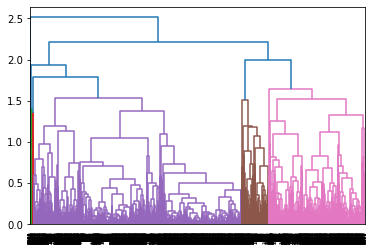

In [25]:
dendrogram=sch.dendrogram(sch.linkage(df_norm,method='complete'))

In [26]:
hc=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='complete')
hc

AgglomerativeClustering(linkage='complete', n_clusters=4)

In [27]:
y_hc=hc.fit_predict(df_norm)
y_hc

array([0, 0, 0, ..., 2, 0, 0], dtype=int64)

In [28]:
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
Clusters

,Clusters
0,0
1,0
2,0
3,0
4,1
...,...
3994,2
3995,2
3996,2
3997,0


In [19]:
Clusters.value_counts()

Clusters
0           2526
2           1144
1            325
3              4
dtype: int64

In [31]:
EWA1['h_clusterid']=y_hc
EWA1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [30]:
EWA1.groupby('h_clusterid').mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
h_clusterid,,,,,,,,,,,
0,59791.056611,88.188836,1.703484,1.018606,1.011085,10324.882423,9.192003,230.441013,0.672209,3824.887965,0.003167
1,157084.578462,208.673846,4.661538,1.000000,1.061538,70477.086154,23.249231,1019.433846,3.196923,5770.572308,1.000000
2,80173.963287,248.550699,2.104895,1.009615,1.000874,16882.864510,13.412587,739.958916,2.236888,4304.383741,1.000000
3,131999.500000,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.000000


# K-Mean

In [34]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [47]:
EWA=pd.read_csv("Downloads\\EastWestAirlines.csv")
EWA

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [48]:
EWA2=EWA.drop(['ID#'],axis=1)
EWA2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [49]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
Scaled_EWA2_df=Scaler.fit_transform(EWA2)
Scaled_EWA2_df

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

[43989.00000000009, 35409.511452424435, 30899.24682465214, 27446.37245668133, 24541.329582045764, 21089.97362892965, 19165.861458655592, 17316.86644612829, 16043.406242309538, 14726.983322766806, 13705.961065176263, 12946.804929785309, 12427.824212114168, 11978.22686087685, 11454.97832675663, 11182.29724912444, 10768.360874774477, 10455.577044318054, 10096.381292564367, 9957.299354697905]


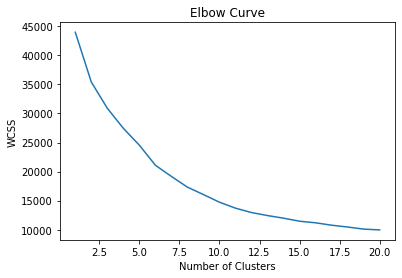

In [50]:
wcss=[]
for i in range(1,21):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(Scaled_EWA2_df)
    wcss.append(kmeans.inertia_)
print(wcss)
plt.plot(range(1,21),wcss)
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()
               


In [51]:
from sklearn.cluster import KMeans
clusters_new=KMeans(13,random_state=0)
clusters_new.fit(Scaled_EWA2_df)

KMeans(n_clusters=13, random_state=0)

In [52]:
clusters_new.labels_

array([ 1,  1,  1, ...,  4, 12, 12])

In [53]:
EWA2['clusterid_new']=clusters_new.labels_
EWA2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,6
3995,64385,0,1,1,1,981,5,0,0,1395,1,6
3996,73597,0,3,1,1,25447,8,0,0,1402,1,4
3997,54899,0,1,1,1,500,1,500,1,1401,0,12


In [54]:
EWA2.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,113144.913580,262.808642,1.716049,1.000000,1.000000,18277.117284,19.660494,3589.080247,10.555556,4198.413580,0.709877
1,1,47080.648649,31.739189,1.100000,1.000000,1.001351,2859.248649,5.464865,145.308108,0.460811,5733.681081,0.000000
2,2,723118.552632,333.736842,3.526316,1.000000,1.000000,57049.184211,21.078947,1287.526316,5.000000,6391.473684,0.842105
3,3,162003.552632,659.736842,2.526316,1.000000,1.000000,44506.605263,38.210526,10006.973684,26.026316,4246.315789,0.947368
4,4,65250.437383,66.867290,3.469159,1.000000,1.000000,29508.132710,17.568224,234.342056,0.684112,4537.755140,1.000000
5,5,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
6,6,55472.540275,105.033399,1.153242,1.000000,1.000000,6160.789784,7.208251,305.231827,0.998035,4270.575639,1.000000
7,7,55970.786070,30.853234,1.952736,1.000000,1.000000,11767.179104,17.094527,104.848259,0.300995,2528.402985,0.002488
8,8,117147.384615,5781.788462,1.980769,1.000000,1.000000,18364.480769,12.288462,938.788462,2.865385,3961.134615,0.500000


In [55]:
EWA2['clusterid_new'].value_counts()

12    808
1     740
4     535
6     509
10    435
7     402
11    222
0     162
8      52
9      43
2      38
3      38
5      15
Name: clusterid_new, dtype: int64

# DBSCAN

In [200]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [201]:
EWA=pd.read_csv("Downloads\\EastWestAirlines.csv")
EWA

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [202]:
EWA3=EWA.drop(['ID#'],axis=1)
EWA3

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [203]:
print(EWA3.head())

   Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    28143           0          1          1          1          174   
1    19244           0          1          1          1          215   
2    41354           0          1          1          1         4123   
3    14776           0          1          1          1          500   
4    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1  


In [204]:
print(EWA3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB
None


In [205]:
array=EWA3.values
array

array([[28143,     0,     1, ...,     0,  7000,     0],
       [19244,     0,     1, ...,     0,  6968,     0],
       [41354,     0,     1, ...,     0,  7034,     0],
       ...,
       [73597,     0,     3, ...,     0,  1402,     1],
       [54899,     0,     1, ...,     1,  1401,     0],
       [ 3016,     0,     1, ...,     0,  1398,     0]], dtype=int64)

In [206]:
SS=StandardScaler()
x=SS.fit_transform(array)
x

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [207]:
dbscan=DBSCAN(eps=2,min_samples=8)
dbscan.fit(x)

DBSCAN(eps=2, min_samples=8)

In [208]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [209]:
EWA3['Cluster']=pd.DataFrame(dbscan.labels_)
EWA3

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [210]:
EWA3['Cluster'].value_counts()

 0    2445
 1    1314
-1     215
 2      16
 3       9
Name: Cluster, dtype: int64

In [211]:
(len(EWA3[EWA3['Cluster']==-1])/len(EWA3))*100

5.376344086021505

In [212]:
x=metrics.silhouette_score(x,dbscan.labels_)
x

0.2600354605303995

In [213]:
def dbscan(x,eps,min_samples):
    ss=StandardScaler()
    x=ss.fit_transform(x)
    db=DBSCAN(eps=eps,min_samples=min_samples)
    db.fit(x)
    y_pred=db.fit_predict(x)
    plt.scatter(x[:,0],x[:,1],c=y_pred,cmap='Paired')
    plt.title("DBSCAN")

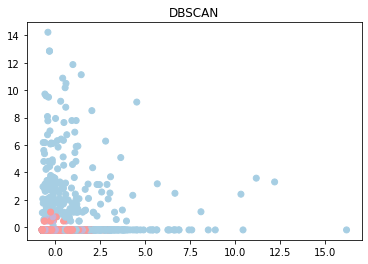

In [214]:
dbscan(array,1.0,8)